# Capstone Project - Prediction of crop production 
###  Problem Statement 
To predict the crop production in India 

In [1]:
# import  Basic libraries 
import pandas as pd # Handling data into DataFrame format
import numpy as np # Handling numerical functions
import seaborn as sns # Handling Visulization tasks
import matplotlib.pyplot as plt # Handling Plots and plot dimensions in notebook
import warnings # Clearing Notebook version warnings from the notebook
warnings.filterwarnings("ignore") # setting warnings status to be ignored

In [3]:
# Read the file from local drive
crop = pd.read_csv(r"D:\new Data science class\project\capstone 1_ ml_regression_cropProduction\crop_production.csv")

### EDA

In [4]:
# Primary data Inspection 
crop.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


### Data fields :
* **State_Name** -- Name of the State
* **District_Name** -- Name of the District
* **Crop_Year** -- The year of production
* **Season** -- Current season
* **Crop** -- Type of crop
* **Area** -- Area of the agricultural field
* **Production**(target variable) -- Total crop production

In [7]:
# Check the no of records and fields in dataset
crop.shape

(246091, 7)

* There are 2,46,091 records 
* There are 7 fields in the dataset

#### Null check 

In [8]:
# checking nulls 
crop.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

* There are some nulls in target variable(Production)

In [48]:
# dropping nulls 
crop = crop.dropna()

In [10]:
# checking the shape again to verify if dropna is executed
crop.shape

(242361, 7)

In [5]:
#Finding the duplicates from dataset
print(crop.duplicated().sum())

0


* Thera are no duplicates in the dataset 

In [6]:
# Information about dataset 
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [12]:
# Description of numeric columns 
crop.describe()

,Crop_Year,Area,Production
count,242361.000000,2.423610e+05,2.423610e+05
mean,2005.625773,1.216741e+04,5.825034e+05
std,4.958285,5.085744e+04,1.706581e+07
min,1997.000000,1.000000e-01,0.000000e+00
25%,2002.000000,8.700000e+01,8.800000e+01
50%,2006.000000,6.030000e+02,7.290000e+02
75%,2010.000000,4.545000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


* The data is for years 1997-2015 
* The range of area and production is very large 

In [13]:
# finding unique values in each column 
for col in crop.columns:
        n = len(crop[col].unique())
        print("The no of unique values in {} are {}".format(col,n))

The no of unique values in State_Name are 33
The no of unique values in District_Name are 646
The no of unique values in Crop_Year are 19
The no of unique values in Season are 6
The no of unique values in Crop are 124
The no of unique values in Area are 38391
The no of unique values in Production are 51627


In [14]:
# splitting into numeric and categorical columns 
nc = crop.select_dtypes(exclude= 'object').columns.values
fc = crop.select_dtypes(include='object').columns.values
nc,fc

(array(['Crop_Year', 'Area', 'Production'], dtype=object),
 array(['State_Name', 'District_Name', 'Season', 'Crop'], dtype=object))

#### Multicolinearity check 

<AxesSubplot:>

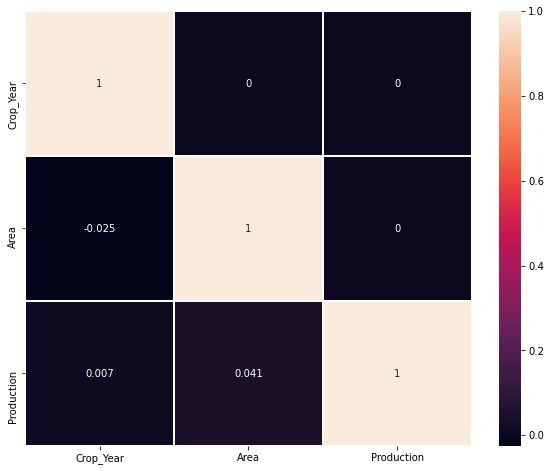

In [15]:
# check for multicolinaerity 
cor = np.tril(crop[nc].corr())

plt.figure(figsize=(10,8))
sns.heatmap(cor, annot= True, xticklabels= nc, yticklabels = nc, linewidths = 1 )

* There is no multicolinearity in the variables

### Visualization 

 #### Overall crop production by state

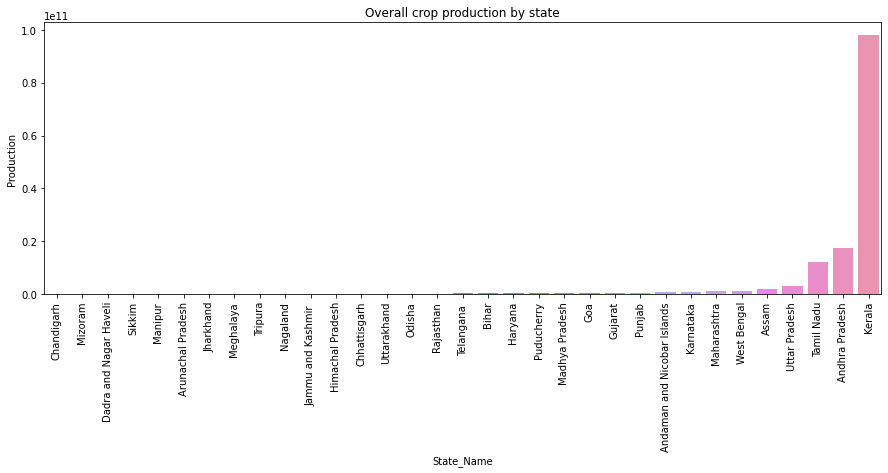

In [16]:
temp = crop.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production')

fig = plt.figure(figsize = (15, 5))
sns.barplot(temp['State_Name'],temp['Production'])
plt.xticks( rotation='vertical')
plt.title("Overall crop production by state")
plt.show()

From above graph we can see that :
* Kerala is the highest crops producing state overall.  
* Top 3 crop producing states are from south India, which put together leave no space to compare rest states.  

#### Productivity of different states

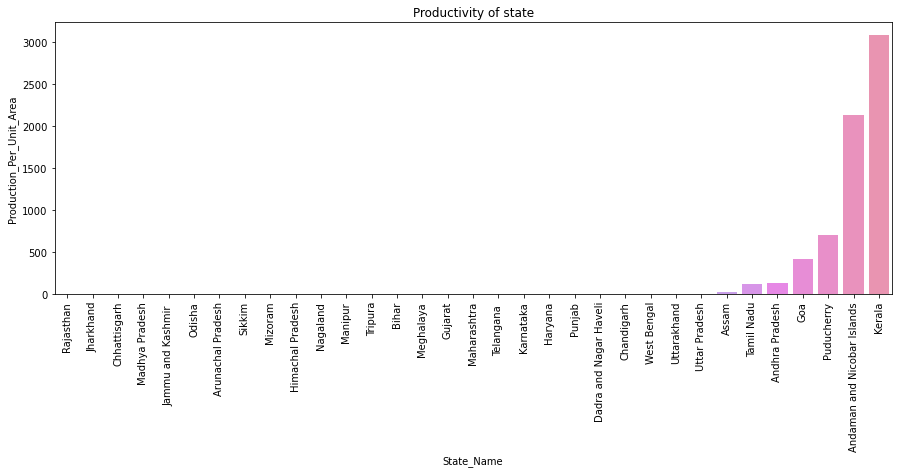

In [17]:
temp = crop.groupby('State_Name')['Area', 'Production'].sum().reset_index()
temp['Production_Per_Unit_Area'] = temp['Production']/temp['Area']
temp = temp.sort_values(by='Production_Per_Unit_Area')

fig = plt.figure(figsize = (15, 5))
sns.barplot(temp['State_Name'],temp['Production_Per_Unit_Area'])
plt.xticks( rotation='vertical')
plt.title("Productivity of state")
plt.show()

Above graph tells us that :
* Kerala is the most productive state when we compare in terms of production by area.
* We see Andaman and nikobar islands, Puducherry, Goa and many other states which are low in overall production, have high productivity 

#### Overall production through years

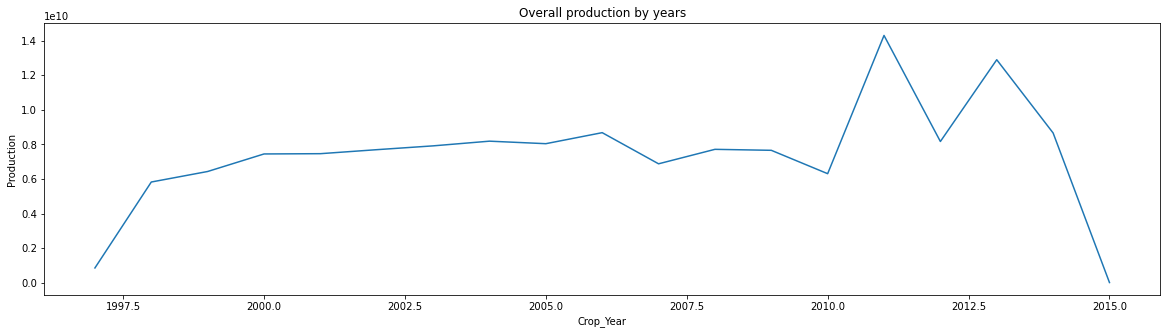

In [18]:
temp = crop.groupby(by='Crop_Year')['Production'].sum().reset_index()

fig = plt.figure(figsize = (20, 5))
sns.lineplot(temp['Crop_Year'],temp['Production'])
plt.title("Overall production by years")
plt.show()

There is no trend in production over the years, this may be due to climatic reasons

#### Average Crop Area through years

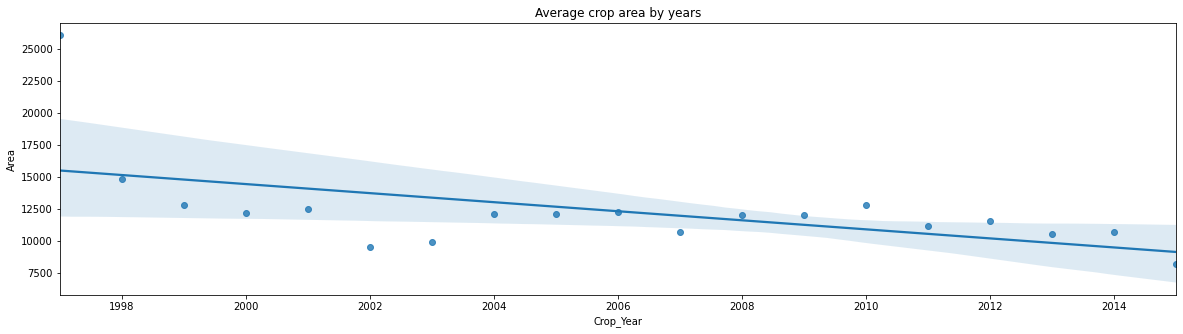

In [19]:
temp = crop.groupby(by='Crop_Year')['Area'].mean().reset_index()

fig = plt.figure(figsize = (20, 5))
sns.regplot(temp['Crop_Year'],temp['Area'])
plt.title("Average crop area by years")
plt.show()

In Above Graph we can see that :
* Average Crop Area has decresed over the years.Large dip in area after 1996.
* We had the lowest Average Crop area in Years 2002 and 2003. (We have very comparitively very less data of year 2015 so, we'll not consider that)

#### Most and Least crop producing districts

Text(0.5, 1.0, 'Least crop producing district')

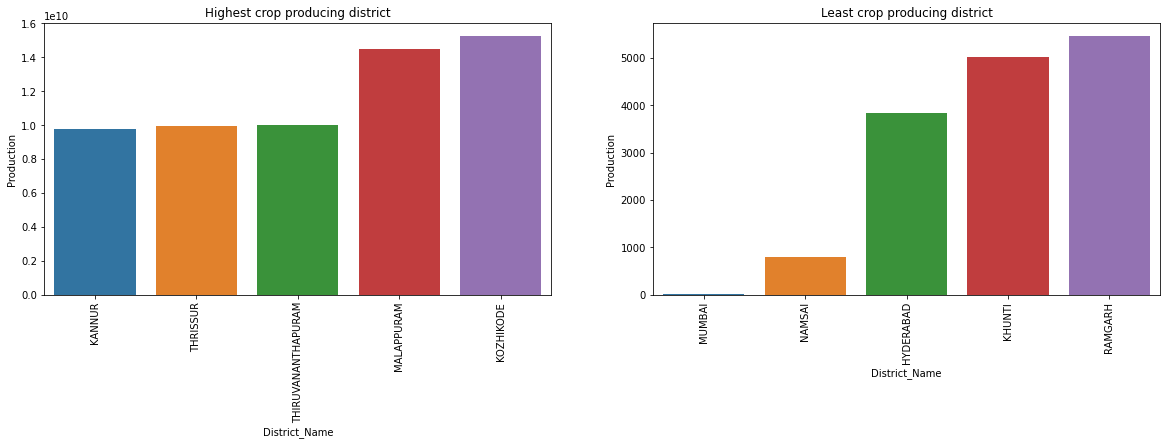

In [20]:
temp = crop.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by='Production')
temp1 = temp.tail()

fig = plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
sns.barplot(temp1['District_Name'],temp1['Production'])
plt.xticks(rotation=90)
plt.title("Highest crop producing district")

temp2 = temp.head()
plt.subplot(1,2,2)
sns.barplot(temp2['District_Name'],temp2['Production'])
plt.xticks(rotation=90)
plt.title("Least crop producing district")

#### Overall production and area according to season 

Text(0.5, 1.0, 'Overall area according to season')

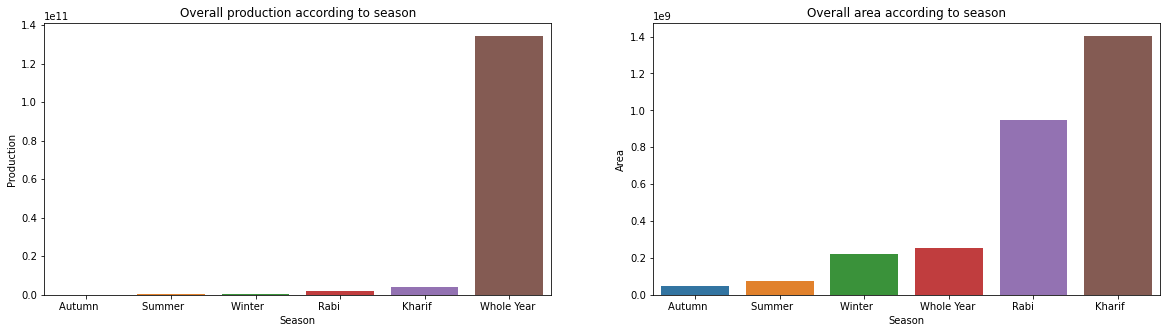

In [21]:
temp = crop.groupby(by='Season')['Production'].sum().reset_index().sort_values(by='Production')
temp1 = crop.groupby(by='Season')['Area'].sum().reset_index().sort_values(by='Area')

fig = plt.figure(figsize = (20, 5))

plt.subplot(1,2,1)
sns.barplot(temp["Season"],temp["Production"])
plt.title("Overall production according to season")

plt.subplot(1,2,2)
sns.barplot(temp1["Season"],temp1["Area"])
plt.title("Overall area according to season")


From above graph we can conclude that 
* whole year has highest production
* but kharif has highest area 

#### Crops having highest production and highest area

Text(0.5, 1.0, 'Crop having highest Area')

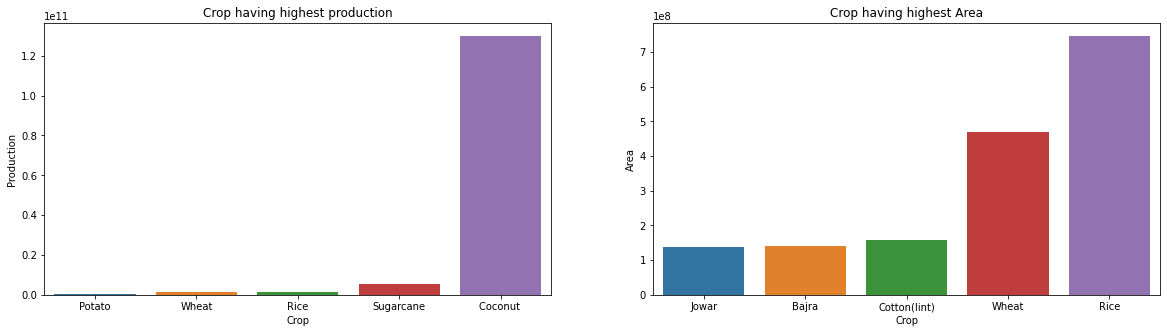

In [22]:
temp = crop.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production')
temp = temp.tail()

temp1 = crop.groupby(by='Crop')['Area'].sum().reset_index().sort_values(by='Area')
temp1 = temp1.tail()

fig = plt.figure(figsize = (20, 5))

plt.subplot(1,2,1)
sns.barplot(temp["Crop"],temp["Production"])
plt.title("Crop having highest production")

plt.subplot(1,2,2)
sns.barplot(temp1["Crop"],temp1["Area"])
plt.title("Crop having highest Area")



From above graphs we can conclude that 
* Coconut has highest production 
* Rice has highest area under production

### Preprocessing

In [49]:
# dropping district column as districts come under state 
crop.drop(columns=['District_Name'],axis=1,inplace=True)
crop.head()
crop.shape

(242361, 6)

In [50]:
# splitting into numeric and categorical columns 
nc = crop.select_dtypes(exclude= 'object').columns.values
fc = crop.select_dtypes(include='object').columns.values
nc,fc

(array(['Crop_Year', 'Area', 'Production'], dtype=object),
 array(['State_Name', 'Season', 'Crop'], dtype=object))

### Machine Learning Models
**Basics of Machine Learning :**

Classification and Regression are two major prediction problems that are usually dealt with machine learning.

**Classification** is the process of finding or discovering a model or function which helps in separating the data into multiple categorical classes i.e. discrete values. In classification, data is categorized under different labels according to some parameters given in input and then the labels are predicted for the data.

The derived mapping function could be demonstrated in the form of “IF-THEN” rules. The problems where the data can be divided into binary or multiple discrete labels is classification problem.

**Regression** is the process of finding a model or function for distinguishing the data into continuous real values instead of using classes or discrete values. It can also identify the distribution movement depending on the historical data. Because a regression predictive model predicts a quantity, therefore, the skill of the model must be reported as an error in those predictions.

> According to this our problem can be identified as a 'Regression' problem

**Linear regression**

linear regression is useful for finding relationship between continuous variables. One is predictors or independent variables and other is response or dependent variable. It looks for statistical relationship but not deterministic relationship. Relationship between two variables is said to be deterministic if one variable can be accurately expressed by the other.

For example, using temperature in degree Celsius it is possible to accurately predict Fahrenheit. Statistical relationship is not accurate in determining relationship between two variables. For example, relationship between height and weight.

The core idea is to obtain a line that best fits the data. The best fit line is the one for which total prediction error (all data points) are as small as possible. Error is the distance between the point to the regression line.

### Model Preprocessing
**Data Encoding**

The performance of a machine learning model not only depends on the model and the hyperparameters but also on how we process and feed different types of variables to the model. Since most machine learning models only accept numerical variables, preprocessing the categorical variables becomes a necessary step. We need to convert these categorical variables to numbers such that the model is able to understand and extract valuable information.

Categorical variables are usually represented as 'strings' or 'categories' and are finite in number.

For encoding categorical data, we have Lable Encoder and One Hot Encoding.

> We used One Hot Encoding for transforming categorical data in this project.This encoding called as 'dummy variables'

The dummy variable can be created by **pandas.get_dummies()** function.

In [51]:
# create dummy variables 
crop_new = crop.copy()

for c in fc:
    dummy = pd.get_dummies(crop_new[c],drop_first= True, prefix= c)
    crop_new = crop_new.join(dummy)
print(crop_new.columns)

Index(['State_Name', 'Crop_Year', 'Season', 'Crop', 'Area', 'Production',
       'State_Name_Andhra Pradesh', 'State_Name_Arunachal Pradesh',
       'State_Name_Assam', 'State_Name_Bihar',
       ...
       'Crop_Turmeric', 'Crop_Turnip', 'Crop_Urad', 'Crop_Varagu',
       'Crop_Water Melon', 'Crop_Wheat', 'Crop_Yam', 'Crop_other fibres',
       'Crop_other misc. pulses', 'Crop_other oilseeds'],
      dtype='object', length=166)


In [52]:
# remove old factor variables 
crop_new.drop(columns=fc, inplace = True)
crop_new.columns

Index(['Crop_Year', 'Area', 'Production', 'State_Name_Andhra Pradesh',
       'State_Name_Arunachal Pradesh', 'State_Name_Assam', 'State_Name_Bihar',
       'State_Name_Chandigarh', 'State_Name_Chhattisgarh',
       'State_Name_Dadra and Nagar Haveli',
       ...
       'Crop_Turmeric', 'Crop_Turnip', 'Crop_Urad', 'Crop_Varagu',
       'Crop_Water Melon', 'Crop_Wheat', 'Crop_Yam', 'Crop_other fibres',
       'Crop_other misc. pulses', 'Crop_other oilseeds'],
      dtype='object', length=163)

In [53]:
crop_new.head()

,Crop_Year,Area,Production,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,2000,1254.0,2000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,2.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2000,102.0,321.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2000,176.0,641.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000,720.0,165.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Train test split 

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem.

The train-test split is a technique for evaluating the performance of a machine learning algorithm.

It can be used for classification or regression problems and can be used for any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

* Train Dataset : Used to fit the machine learning model.
* Test Dataset : Used to evaluate the fit machine learning model.

The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.

This is how we expect to use the model in practice. Namely, to fit it on available data with known inputs and outputs, then make predictions on new examples in the future where we do not have the expected output or target values.

The train-test procedure is appropriate when there is a sufficiently large dataset available.

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
# function to split data into train and test 
def splitdata(data,y, ratio= 0.3):
    trainx, testx, trainy, testy = train_test_split(data.drop(y,1),
                                                    data[y],
                                                    test_size = ratio,random_state=123)
    return(trainx, testx, trainy, testy)

In [56]:
# splitting data into train and test 
trainx, testx, trainy,testy = splitdata(crop_new, 'Production')

In [57]:
print("trainx :",trainx.shape)
print("trainy :",trainy.shape)

print("testx :",testx.shape)
print("testy :",testy.shape)

trainx : (169652, 162)
trainy : (169652,)
testx : (72709, 162)
testy : (72709,)


### Model1: Linear regression 

In [135]:
from sklearn.linear_model import LinearRegression

In [136]:
# model building
model1 = LinearRegression()
model1.fit(trainx,trainy)

LinearRegression()

In [137]:
# predictions 
pred1 = model1.predict(testx)

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

In [139]:
# Evaluation 
mse1 = mean_squared_error(testy,pred1)
r = r2_score(testy,pred1)
print("model 1 \n\tmse = {}, \n\trmse = {}, \n\tr2_score= {}".format(round(mse1,2),round(np.sqrt(mse1),2),r))

model 1 
	mse = 270292534957241.3, 
	rmse = 16440575.87, 
	r2_score= 0.15471597432218864


<AxesSubplot:xlabel='Production', ylabel='Density'>

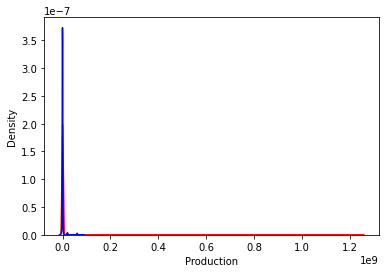

In [38]:
# chart that shows actual and predicted values- distplot
ax1= sns.distplot(testy, hist = False, color = 'red', label = 'actual')
sns.distplot(pred1, hist= False,color = 'blue',label = 'predicted', ax= ax1 )

<AxesSubplot:xlabel='Production'>

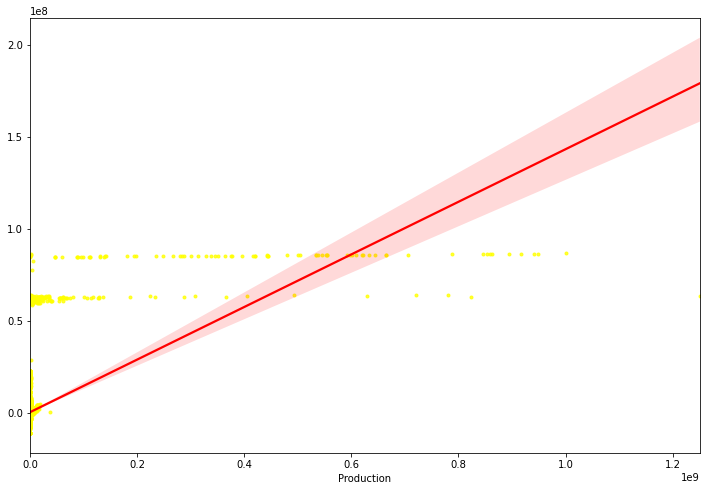

In [39]:
# regplot
plt.figure(figsize= (12,8))
sns.regplot(testy, pred1, marker= ".", color= "yellow", line_kws= {'color':'red'})

This is clearly not a linear regression problem, Lets try other regression algorithms 

### Model2: Decision Tree Regressor 
This tree count isolates the collected information into small subsets, at a comparative same time makes it persistent. The last results show the tree having the decision centres, likewise, the leaf centres. This decision centre point may contain two branches at any rate. At first think about the whole informational index as root. Feature regards are kicked out of the chance. In case the characteristics are relentless then they have to be discretized before structuring the model. In view of estimation property records are corrected recursively.Information Gain and Gini index are two essential properties in the decision of tree computation. Information Gain is defined as the amount change in entropy. Higher entropy indicates more effectiveness of the substance. Thus the entropy is a proportion of vulnerability of arbitrary variable. Gini Index measures how regularly an arbitrarily picked component would be falsely recognized. It implies a characteristic with a lower Gini index ought to be liked.  
Having a class with the maximum number of an expected value obtained by the split function called information gain. If the class is kept splitting and splitting without any condition at the leaf node, the algorithm will be huge, slow and over fitted. To stop this, a minimum count on the training example on the leaf node is assigned.

In [141]:
from sklearn.tree import DecisionTreeRegressor 

In [142]:
# model building
model2 = DecisionTreeRegressor()
model2.fit(trainx,trainy)

# predictions 
pred2 = model2.predict(testx)

# Evaluation
mse2 = mean_squared_error(testy,pred2)
r2= r2_score(testy,pred2)
print("model Decission Tree Regressor \n\tmse = {}, \n\trmse = {}, \n\tr2_score= {}".format(round(mse2,2),round(np.sqrt(mse2),2),r2))

model Decission Tree Regressor 
	mse = 8760517012942.86, 
	rmse = 2959817.06, 
	r2_score= 0.9726032940980381


<AxesSubplot:xlabel='Production'>

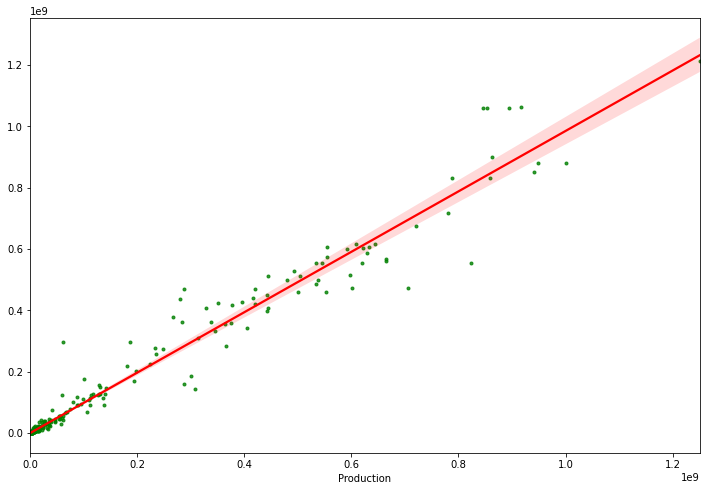

In [46]:
# chart that shows actual and predicted values- regplot
plt.figure(figsize= (12,8))
sns.regplot(testy, pred2, marker= ".", color= "green", line_kws= {'color':'red'})

In [62]:
# store results in dataframe for analysis
df1 = pd.DataFrame({"actual":testy, "predicted":pred2})
df1.sort_values(by='actual',ascending=False).head(30)

,actual,predicted
178273,1.250800e+09,1.212000e+09
100391,1.001000e+09,8.820000e+08
100373,9.480000e+08,8.820000e+08
100297,9.410000e+08,8.510000e+08
100625,9.160530e+08,9.520000e+08
100178,8.950000e+08,1.059000e+09
100552,8.630000e+08,9.000000e+08
100513,8.580000e+08,8.320000e+08
100245,8.540000e+08,1.059000e+09
100258,8.450000e+08,1.059000e+09


### Ensemble Models
Ensemble learning is a general meta approach to machine learning that seeks better predictive performance by combining the predictions from multiple models.

Although there are a seemingly unlimited number of ensembles that you can develop for your predictive modeling problem, there are three methods that dominate the field of ensemble learning.each is a field of study that has spawned many more specialized methods.

The three main classes of ensemble learning methods are bagging, stacking, and boosting, and it is important to both have a detailed understanding of each method and to consider them on your predictive modeling project.

* **Bagging** involves fitting many decision trees on different samples of the same dataset and averaging the predictions.
* **Stacking** involves fitting many different models types on the same data and using another model to learn how to best combine the predictions.
* **Boosting** involves adding ensemble members sequentially that correct the predictions made by prior models and outputs a weighted average of the predictions.

Some of the Ensemble models I used are :

* Random Forest Regressor
* AdaBoost Regressor
* Gradient Boosting Regressor
* XGBoost
I Compare this all model to find the perfect model giving good performance on data.

### Model 3 : Random Forest Regressor
Random Forest is an ensemble learning technique where training model uses multiple learning algorithms and then combine individual results to get a final predicted result.Under ensemble learning random forest falls into bagging category where random number of features and records will be selected and passed to the group of models. Random forest basically uses group of decision trees as group of models.Random amount of data is passed to decision trees and each decision tree predicts values according to the dataset given to it. From the predictions made by the decision trees the average value of the predicted values if considered as the output of the random forest model.

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
# model building
model3 = RandomForestRegressor()
model3.fit(trainx,trainy)

RandomForestRegressor()

In [62]:
# predictions 
pred3 = model3.predict(testx)

# Evaluation
mse3 = mean_squared_error(testy,pred3)
r3= r2_score(testy,pred3)
print("model Random Forest Regressor \n\tmse = {}, \n\trmse = {}, \n\tr2_score= {}".format(round(mse3,2),round(np.sqrt(mse3),2),r3))

model Random Forest Regressor 
	mse = 19341818127092.92, 
	rmse = 4397933.39, 
	r2_score= 0.9395124623290705


In [63]:
# store results in dataframe for analysis
df2 = pd.DataFrame({"actual":testy, "predicted":pred3})
df2.sort_values(by='actual',ascending=False).head(30)

,actual,predicted
178273,1.250800e+09,6.217023e+08
100391,1.001000e+09,8.593961e+08
100373,9.480000e+08,8.594361e+08
100297,9.410000e+08,8.420730e+08
100625,9.160530e+08,8.648295e+08
100178,8.950000e+08,9.349400e+08
100552,8.630000e+08,8.834603e+08
100513,8.580000e+08,8.830428e+08
100245,8.540000e+08,9.348301e+08
100258,8.450000e+08,9.212701e+08


### Hyperparamter Tuning
Machine learning models have hyperparameters that must set in order to customize the model to your dataset.
Often the general effects of hyperparameters on a model are known, but how to best set a hyperparameter and combinations of interacting hyperparameters for a given dataset is challenging. There are often general heuristics or rules of thumb for configuring hyperparameters.
A better approach is to objectively search different values for model hyperparameters and choose a subset that results in a model that achieves the best performance on a given dataset. This is called hyperparameter optimization or hyperparameter tuning.

There are a range of different optimization algorithms may be used for tuning a model, although two of the simplest and most common methods are random search and grid search.

* **Random Search**: Define a search space as a bounded domain of hyperparameter values and randomly sample points in that domain.
* **Grid Search**: Define a search space as a grid of hyperparameter values and evaluate every position in the grid.

Grid search is great for spot-checking combinations that are known to perform well generally. 

Random search is great for discovery and getting hyperparameter combinations that you would not have guessed intuitively, although it often requires more time to execute.

> Hence I used GridSearchCV for tuning model.

### Model4: Random forest regressor with GridSearchCV

In [41]:
# hyper parameter tuning for random Forest Regressor using Grid Search CV
from sklearn.model_selection import GridSearchCV

In [68]:
model3.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [77]:
# build the parameters 
params = {
    'max_depth': [20,100,200,500],
    'max_features': [3,5,10,15],
    'min_samples_leaf': [1,2,3, 4],
    'min_samples_split': [1,2,5],
    'n_estimators': [100, 200, 300]

}

In [ ]:
# random forest regressor 
model = RandomForestRegressor()

grid = GridSearchCV(model, param_grid = params,cv = 3,
                    n_jobs= -1).fit(trainx,trainy)

In [72]:
# best parameters 
bp = grid.best_params_
bp

{'max_depth': 20,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [152]:
# build the Random forest regresor model using best parameters 
# model building
model4 = RandomForestRegressor(max_depth=20,max_features=3,min_samples_leaf=3,
                              min_samples_split=2,n_estimators=200).fit(trainx,trainy)

In [153]:
# predictions 
pred4 = model4.predict(testx)

# Evaluation
mse4 = mean_squared_error(testy,pred4)
r4= r2_score(testy,pred4)
print("model Random Forest Regressor with Hyper parameter tuning \n\tmse = {}, \n\trmse = {}, \n\tr2_score= {}".
      format(round(mse4,2),round(np.sqrt(mse4),2),r4))

model Random Forest Regressor with Hyper parameter tuning 
	mse = 176430221113917.47, 
	rmse = 13282703.83, 
	r2_score= 0.4482509567717413


### AdaBoost Regressor-Decision Tree
The first realization of boosting that saw great success in application was Adaptive Boosting or AdaBoost for short. Adaboost helps you combine multiple 'weak regressor' into a single 'strong regressor'

* The weak learners in AdaBoost are decision trees with a single split, called decision stumps.
* AdaBoost works by putting more weight on difficult to classify instances and less on those already handled well.
* AdaBoost algorithms can be used for both classification and regression problem.

### Model5: Adaboost Regressor with RandomForest as base model

In [154]:
from sklearn.ensemble import AdaBoostRegressor

In [155]:
model5 = AdaBoostRegressor(RandomForestRegressor(max_depth=1),n_estimators=50,learning_rate= 1).fit(trainx,trainy)

In [156]:
# predictions 
pred5 = model5.predict(testx)

# Evaluation
mse5 = mean_squared_error(testy,pred5)
r5= r2_score(testy,pred5)
print("model Adaboost Regressor \n\tmse = {}, \n\trmse = {}, \n\tr2_score= {}".format(round(mse5,2),round(np.sqrt(mse5),2),r5))

model Adaboost Regressor 
	mse = 215700275036595.12, 
	rmse = 14686738.07, 
	r2_score= 0.32544198140141956


### Model 6: Adaboost Regressor with Decision Tree as base model 

In [113]:
model6=AdaBoostRegressor(DecisionTreeRegressor(max_depth=1)).fit(trainx,trainy)

In [114]:
# predictions 
pred6 = model6.predict(testx)

# Evaluation
mse6 = mean_squared_error(testy,pred6)
r6= r2_score(testy,pred6)
print("model Adaboost Regressor \n\tmse = {}, \n\trmse = {}, \n\tr2_score= {}".format(round(mse6,2),round(np.sqrt(mse6),2),r6))

model Adaboost Regressor 
	mse = 229916676337908.47, 
	rmse = 15163003.54, 
	r2_score= 0.2809831252790097


### Gradient boosting 
is one of the most powerful techniques for building predictive models.

Gradient boosting involves three elements:

* A loss function to be optimized.
* A weak learner to make predictions.
* An additive model to add weak learners to minimize the loss function.

**Loss Function** The loss function used depends on the type of problem being solved. It must be differentiable, but many standard loss functions are supported and you can define your own. For example, regression may use a squared error and classification may use logarithmic loss. A benefit of the gradient boosting framework is that a new boosting algorithm does not have to be derived for each loss function that may want to be used, instead, it is a generic enough framework that any differentiable loss function can be used.

**Weak Learner** Decision trees are used as the weak learner in gradient boosting. Specifically regression trees are used that output real values for splits and whose output can be added together, allowing subsequent models outputs to be added and 'correct' the residuals in the predictions. Trees are constructed in a greedy manner, choosing the best split points based on purity scores like Gini or to minimize the loss. It is common to constrain the weak learners in specific ways, such as a maximum number of layers, nodes, splits or leaf nodes. This is to ensure that the learners remain weak, but can still be constructed in a greedy manner.

**Additive Model** Trees are added one at a time, and existing trees in the model are not changed. A gradient descent procedure is used to minimize the loss when adding trees. Traditionally, gradient descent is used to minimize a set of parameters, such as the coefficients in a regression equation or weights in a neural network. After calculating error or loss, the weights are updated to minimize that error. Instead of parameters, we have weak learner sub-models or more specifically decision trees. After calculating the loss, to perform the gradient descent procedure, we must add a tree to the model that reduces the loss (i.e. follow the gradient). We do this by parameterizing the tree, then modify the parameters of the tree and move in the right direction by (reducing the residual loss).

### Model 7: Gradient Boosting Regressor 

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

In [115]:
# Building model
model7 = GradientBoostingRegressor()
model7.fit(trainx,trainy)

GradientBoostingRegressor()

In [116]:
# predictions 
pred7 = model7.predict(testx)

# Evaluation
mse7 = mean_squared_error(testy,pred7)
r7= r2_score(testy,pred7)
print("model Gradient Boosting Regressor \n\tmse = {}, \n\trmse = {}, \n\tr2_score= {}".format(round(mse7,2),round(np.sqrt(mse7),2),r7))

model Gradient Boosting Regressor 
	mse = 32524494841495.98, 
	rmse = 5703025.06, 
	r2_score= 0.8982863661510072


In [117]:
model7.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### Model 8: Gradient boosting regressor using GridSearchCV

In [126]:
# using GridSearchCV
params = ({'n_estimators':[50,100,150,200],
         'learning_rate':[2,1,0.1,0.01,0.001],
         'max_depth':[1,2,3,4,5]
          })

In [127]:
gbr= GradientBoostingRegressor()

grid = GridSearchCV(gbr, param_grid = params,cv = 3,
                    n_jobs= -1).fit(trainx,trainy)

In [128]:
# best parameters 
bp = grid.best_params_

{'max_depth': 4}

In [129]:
# model building
model8 = GradientBoostingRegressor(learning_rate=0.1,max_depth= 4,n_estimators=200).fit(trainx,trainy)

In [130]:
# predictions 
pred8= model8.predict(testx)

# Evaluation
mse8 = mean_squared_error(testy,pred8)
r8= r2_score(testy,pred8)
print("model Gradient Boosting Regressor using GridSearchCV \n\tmse = {}, \n\trmse = {}, \n\tr2_score= {}".format(round(mse8,2),round(np.sqrt(mse8),2),r8))

model Gradient Boosting Regressor using GridSearchCV 
	mse = 21662891193146.55, 
	rmse = 4654341.11, 
	r2_score= 0.9322537861489217


### XGBoost Regressor
XGBoost is one of the most popular variants of gradient boosting. It is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. XGBoost is basically designed to enhance the performance and speed of a Machine Learning model. In prediction problems involving unstructured data (images, text, etc.), artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree-based algorithms are considered best-in-class right now.

XGBoost uses pre-sorted algorithm & histogram-based algorithm for computing the best split. The histogram-based algorithm splits all the data points for a feature into discrete bins and uses these bins to find the split value of the histogram. Also, in XGBoost, the trees can have a varying number of terminal nodes and left weights of the trees that are calculated with less evidence is shrunk more heavily.
### Model 9: XGboost Regressor Model

In [131]:
import xgboost as xg

In [132]:
# Building model
model9 = xg.XGBRegressor()
model9.fit(trainx,trainy)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [133]:
# predictions 
pred9 = model9.predict(testx)

# Evaluation
mse9 = mean_squared_error(testy,pred8)
r9= r2_score(testy,pred8)
print("model XGBoost Regressor \n\tmse = {}, \n\trmse = {}, \n\tr2_score= {}".format(round(mse9,2),round(np.sqrt(mse9),2),r9))

model XGBoost Regressor 
	mse = 21662891193146.55, 
	rmse = 4654341.11, 
	r2_score= 0.9322537861489217


### Model 10: XGBoost Regressor with GridSearchCV

In [158]:
# using GridSearchCV
params = ({'n_estimators':[50,100,200,500],
         'learning_rate':[1,0.1,0.01,0.001],
         'max_depth':[1,5,10,15]
          })

In [74]:
xgbr= xg.XGBRegressor()

grid = GridSearchCV(xgbr, param_grid = params,cv = 3,
                    n_jobs= -1).fit(trainx,trainy)

In [68]:
bp=grid.best_params_

{'n_estimators': 500}

In [159]:
model10 = xg.XGBRegressor(objective ='reg:linear',n_estimators=500,learning_rate=0.1,max_depth=5,n_jobs=-1)
model10.fit(trainx,trainy)

[19:12:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=-1,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [160]:
# predictions 
pred10 = model10.predict(testx)

# Evaluation
mse10 = mean_squared_error(testy,pred10)
r10= r2_score(testy,pred10)
print("model XGBoost Regressor usin GridSearchCV \n\tmse = {}, \n\trmse = {}, \n\tr2_score= {}".format(round(mse10,2),round(np.sqrt(mse10),2),r10))

model XGBoost Regressor usin GridSearchCV 
	mse = 17413226833141.69, 
	rmse = 4172915.87, 
	r2_score= 0.9455437329044719


### Feature engineering 
* 1. Reducing the levels of crop by classifying crops into cereals, pulses, fruits, vegetables etc 
* 2. Reducing the levels for state into regions:north-south-east-west-northEast-Central

In [82]:
# reducing crop level by classifying crops into cereals,pulses,etc
pd.unique(crop["Crop"]),len(pd.unique(crop["Crop"]))

(array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
        'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
        'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
        'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
        'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
        'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
        'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
        'Samai', 'Small millets', 'Coriander', 'Potato',
        'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
        'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
        'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
        'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
        'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
        'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu'

In [83]:
cc=crop['Crop']
def cat_crop(cc):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar','Total foodgrain']:
        if cc==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total']:
        if cc==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if cc==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Tapioca','Soyabean','Horse-gram','Gram']:
        if cc==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion']:
        if cc==i:
            return 'Vegetables'
    for i in ['Perilla','Colocosia','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies']:
        if cc==i:
            return 'Species'
    for i in ['Jobster','Cond-spcs other']:
        if cc==i:
            return 'Other'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)']:
        if cc==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if cc==i:
            return 'Nuts'
    for i in ['Rubber']:
        if cc==i:
            return 'Natural Polymer'
    for i in ['Coffee']:
        if cc== i:
            return 'Coffee'
    for i in ['Tea']:
        if cc==i:
            return 'Tea'
    for i in ['Paddy']:
        if cc==i:
            return 'Paddy'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if cc==i:
            return 'Oilseeds'
    for i in ['Sannhamp']:
        if cc==i:
            return 'Fertile Plant'
    for i in ['Tobacco']:
        if cc==i:
            return 'Commercial'
    for i in ['Sugarcane']:
        if cc==i:
            return 'Sugarcane'

In [84]:
crop['cat_crop']=crop['Crop'].apply(cat_crop)

In [85]:
crop.head()

,State_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
0,Andaman and Nicobar Islands,2000,Kharif,Arecanut,1254.0,2000.0,Nuts
1,Andaman and Nicobar Islands,2000,Kharif,Other Kharif pulses,2.0,1.0,Pulses
2,Andaman and Nicobar Islands,2000,Kharif,Rice,102.0,321.0,Cereal
3,Andaman and Nicobar Islands,2000,Whole Year,Banana,176.0,641.0,Fruits
4,Andaman and Nicobar Islands,2000,Whole Year,Cashewnut,720.0,165.0,Nuts


In [86]:
crop.cat_crop.value_counts()

Cereal             62795
Oilseeds           33801
Pulses             33671
Species            21631
Vegetables         21559
Beans              17926
Nuts               11472
Sugarcane           7827
fibres              7602
Fruits              6153
Commercial          2637
Fertile Plant       2183
Paddy                479
Tea                   62
Natural Polymer       29
Other                 27
Coffee                 6
Name: cat_crop, dtype: int64

In [95]:
# Reducing the levels for state into regions:north-south-east-west-northEast-Central
pd.unique(crop['State_Name']),len(pd.unique(crop['State_Name']))

(array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
        'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
        'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
        'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
        'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
        'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
        'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
        'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
       dtype=object),
 33)

In [96]:
cs=crop['State_Name']
def cat_state(cs):
    for i in ['Arunachal Pradesh', 'Assam','Manipur',
        'Meghalaya', 'Mizoram', 'Nagaland','Sikkim','Tripura']:
        if cs==i:
            return 'North-East'
    for i in ['Chandigarh','Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ','Punjab','Rajasthan']:
        if cs==i:
            return 'North'
    for i in ['Andaman and Nicobar Islands','Andhra Pradesh','Karnataka', 'Kerala','Puducherry','Tamil Nadu', 'Telangana ']:
        if cs==i:
            return 'South'
    for i in ['Bihar','Jharkhand','Odisha','West Bengal']:
        if cs==i:
            return 'East'
    for i in ['Dadra and Nagar Haveli', 'Goa','Gujarat','Maharashtra']:
        if cs==i:
            return 'West'
    for i in ['Chhattisgarh','Madhya Pradesh','Uttar Pradesh', 'Uttarakhand']:
        if cs==i:
            return 'Central'

In [97]:
crop['cat_state']=crop['State_Name'].apply(cat_state)

In [98]:
crop.head()

,State_Name,Crop_Year,Season,Crop,Area,Production,cat_crop,cat_state
0,Andaman and Nicobar Islands,2000,Kharif,Arecanut,1254.0,2000.0,Nuts,South
1,Andaman and Nicobar Islands,2000,Kharif,Other Kharif pulses,2.0,1.0,Pulses,South
2,Andaman and Nicobar Islands,2000,Kharif,Rice,102.0,321.0,Cereal,South
3,Andaman and Nicobar Islands,2000,Whole Year,Banana,176.0,641.0,Fruits,South
4,Andaman and Nicobar Islands,2000,Whole Year,Cashewnut,720.0,165.0,Nuts,South


In [99]:
crop.columns

Index(['State_Name', 'Crop_Year', 'Season', 'Crop', 'Area', 'Production',
       'cat_crop', 'cat_state'],
      dtype='object')

In [100]:
crop_2 = crop[['cat_state','Crop_Year','Season','cat_crop','Area','Production']]
crop_2.head()

,cat_state,Crop_Year,Season,cat_crop,Area,Production
0,South,2000,Kharif,Nuts,1254.0,2000.0
1,South,2000,Kharif,Pulses,2.0,1.0
2,South,2000,Kharif,Cereal,102.0,321.0
3,South,2000,Whole Year,Fruits,176.0,641.0
4,South,2000,Whole Year,Nuts,720.0,165.0


In [101]:
crop_2_dummy=pd.get_dummies(data=crop_2,columns=['cat_state','Season','cat_crop'],drop_first=True)

In [102]:
crop_2_dummy.head()

,Crop_Year,Area,Production,cat_state_East,cat_state_North,cat_state_North-East,cat_state_South,cat_state_West,Season_Kharif,Season_Rabi,...,cat_crop_Nuts,cat_crop_Oilseeds,cat_crop_Other,cat_crop_Paddy,cat_crop_Pulses,cat_crop_Species,cat_crop_Sugarcane,cat_crop_Tea,cat_crop_Vegetables,cat_crop_fibres
0,2000,1254.0,2000.0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,2000,2.0,1.0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,2000,102.0,321.0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2000,176.0,641.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000,720.0,165.0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [103]:
crop_2_dummy.columns

Index(['Crop_Year', 'Area', 'Production', 'cat_state_East', 'cat_state_North',
       'cat_state_North-East', 'cat_state_South', 'cat_state_West',
       'Season_Kharif     ', 'Season_Rabi       ', 'Season_Summer     ',
       'Season_Whole Year ', 'Season_Winter     ', 'cat_crop_Cereal',
       'cat_crop_Coffee', 'cat_crop_Commercial', 'cat_crop_Fertile Plant',
       'cat_crop_Fruits', 'cat_crop_Natural Polymer', 'cat_crop_Nuts',
       'cat_crop_Oilseeds', 'cat_crop_Other', 'cat_crop_Paddy',
       'cat_crop_Pulses', 'cat_crop_Species', 'cat_crop_Sugarcane',
       'cat_crop_Tea', 'cat_crop_Vegetables', 'cat_crop_fibres'],
      dtype='object')

In [104]:
# splitting data into train and test 
trainx1, testx1, trainy1,testy1 = splitdata(crop_2_dummy, 'Production')

In [105]:
print("trainx1 :",trainx1.shape)
print("trainy1 :",trainy1.shape)

print("testx1 :",testx1.shape)
print("testy1 :",testy1.shape)

trainx1 : (169652, 28)
trainy1 : (169652,)
testx1 : (72709, 28)
testy1 : (72709,)


In [163]:
# model building
model11 = RandomForestRegressor()
model11.fit(trainx1,trainy1)

RandomForestRegressor()

In [164]:
# predictions 
pred11 = model11.predict(testx1)

# Evaluation
mse11 = mean_squared_error(testy1,pred11)
r11= r2_score(testy1,pred11)
print("model RandomForest Regressor \n\tmse = {}, \n\trmse = {}, \n\tr2_score= {}".format(round(mse11,2),round(np.sqrt(mse11),2),r11))

model RandomForest Regressor 
	mse = 108366763450482.95, 
	rmse = 10409935.8, 
	r2_score= 0.6611053498995448


* The process of reducing the levels in crop and states has not worked well.
* It has reduced our model performance 

### Model Performance Evaluation
We cannot calculate accuracy for a regression model.

The skill or performance of a regression model must be reported as an error in those predictions. There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model, they are:

* Coefficent of Determination (***R2***)
* Root Mean Squared Error (***RMSE***).
* Mean Absolute Error (***MAE***)

> I have taken 'RMSE' and 'R2' as evaluation criteria for models in this Notebook

* Coefficent of Determination
The coefficient of determination, R2, is used to analyze how differences in one variable can be explained by a difference in a second variable.
![R2 SCORE](https://images.contentful.com/piwi0eufbb2g/7IvlOo4odCmDVSZST2rMzs/07cfe008434a011d1fbec38387fc9234/image.png)
 
* Root Mean Squared Error
The Root Mean Squared Error, or RMSE, is an extension of the mean squared error.
Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.
As such, it may be common to use RMSE to evaluate and report its performance.

The RMSE can be calculated as follows:
![RMSE](https://images.contentful.com/piwi0eufbb2g/1Jv6fvhF9BLCFEjnPsnCG6/33512a6c71c3268295b8bd787c3952cf/image.png)

We can restate the RMSE in terms of the MSE as:
![MSE](https://images.contentful.com/piwi0eufbb2g/2eSAc5PQTXa6y1mm6BN6Ne/1b7c27f4d75bd79e83910e3a2ff4be59/image.png)

### Results 

In [162]:
# Create a dataframe to store the results 
data= [['LinearRegression',r],['DecisionTreeRegressor',r2],
       ['RandomForestRegressor',r3],['Random Forest Regressor with Hyper parameter tuning',r4],
       ['AdaBoostRegressor RandomForest as base model', r5],['AdaBoostRegressor DecisionTree as base model', r6],
       ['GradientBoostingRegressor',r7],['GradientBoostingRegressor with GridSearchCV',r8],
       ['XGboost Regressor',r9],['XGboost Regressor with GridSearchCV',r10]]
df = pd.DataFrame(data=data,columns=['Algorithm','r2_score'])
df

,Algorithm,r2_score
0,LinearRegression,0.154716
1,DecisionTreeRegressor,0.972603
2,RandomForestRegressor,0.949165
3,Random Forest Regressor with Hyper parameter t...,0.448251
4,AdaBoostRegressor RandomForest as base model,0.325442
5,AdaBoostRegressor DecisionTree as base model,0.280983
6,GradientBoostingRegressor,0.898286
7,GradientBoostingRegressor with GridSearchCV,0.932254
8,XGboost Regressor,0.932254
9,XGboost Regressor with GridSearchCV,0.945544


<AxesSubplot:xlabel='Production'>

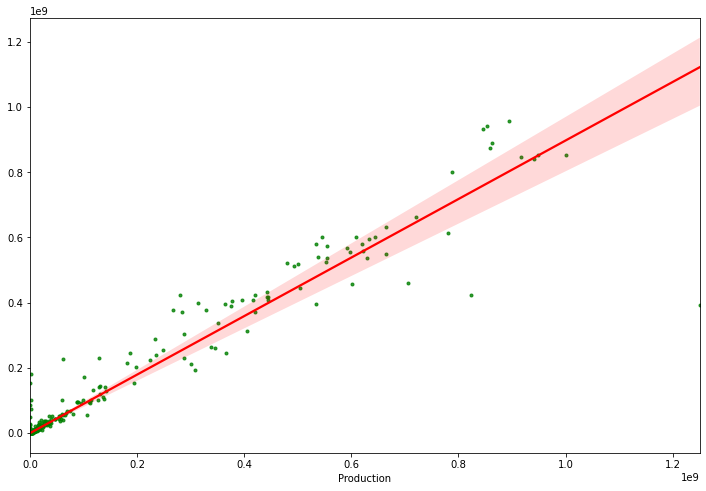

In [63]:
## chart that shows actual and predicted values- regplot for random forest 
plt.figure(figsize= (12,8))
sns.regplot(testy, pred3, marker= ".", color= "green", line_kws= {'color':'red'})

### Conclusion

 1. Decisi0n Tree Regressor has given the best r2_score but the predictions seems to be grouped
 2. Hence Random Forest is the best model for this problem 
 3. Random Forest has given an r2_score of 94.9 i.e approx 95% 
 4. All the boosting models have given almost equal score 
 5. Random Forest can be improved further by correct hyper parameter tuning 
 6. Reducing the levels in crop and state has reduced the model performance 